In [1]:
# https://www.kdnuggets.com/2018/03/text-data-preprocessing-walkthrough-python.html
#!pip install contractions
#!pip install inflect

In [2]:
import re, string, unicodedata
import nltk
import contractions
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [3]:
sample = """<h1>Title Goes Here</h1>
<b>Bolded Text</b>
<i>Italicized Text</i>
<img src="this should all be gone"/>
<a href="this will be gone, too">But this will still be here!</a>
I run. He ran. She is running. Will they stop running?
I talked. She was talking. They talked to them about running. Who ran to the talking runner?
[Some text we don't want to keep is in here]
¡Sebastián, Nicolás, Alejandro and Jéronimo are going to the store tomorrow morning!
something... is! wrong() with.,; this :: sentence.
I can't do this anymore. I didn't know them. Why couldn't you have dinner at the restaurant?
My favorite movie franchises, in order: Indiana Jones; Marvel Cinematic Universe; Star Wars; Back to the Future; Harry Potter.
Don't do it.... Just don't. Billy! I know what you're doing. This is a great little house you've got here.
[This is some other unwanted text]
John: "Well, well, well."
James: "There, there. There, there."
&nbsp;&nbsp;
There are a lot of reasons not to do this. There are 101 reasons not to do it. 1000000 reasons, actually.
I have to go get 2 tutus from 2 different stores, too.
22    45   1067   445
{{Here is some stuff inside of double curly braces.}}
{Here is more stuff in single curly braces.}
[DELETE]
</body>
</html>"""

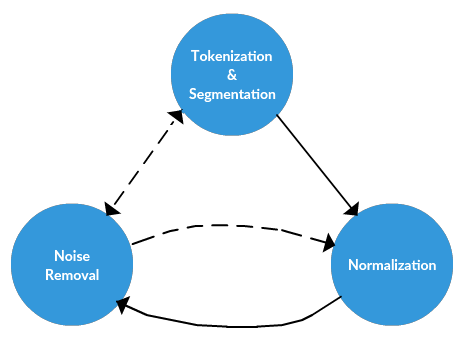

### Noise Removal using BeautifulSoup

In [4]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [5]:
sample = denoise_text(sample)
sample

'Title Goes Here\nBolded Text\nItalicized Text\n\nBut this will still be here!\nI run. He ran. She is running. Will they stop running?\nI talked. She was talking. They talked to them about running. Who ran to the talking runner?\n\n¡Sebastián, Nicolás, Alejandro and Jéronimo are going to the store tomorrow morning!\nsomething... is! wrong() with.,; this :: sentence.\nI can\'t do this anymore. I didn\'t know them. Why couldn\'t you have dinner at the restaurant?\nMy favorite movie franchises, in order: Indiana Jones; Marvel Cinematic Universe; Star Wars; Back to the Future; Harry Potter.\nDon\'t do it.... Just don\'t. Billy! I know what you\'re doing. This is a great little house you\'ve got here.\n\nJohn: "Well, well, well."\nJames: "There, there. There, there."\n\xa0\xa0\nThere are a lot of reasons not to do this. There are 101 reasons not to do it. 1000000 reasons, actually.\nI have to go get 2 tutus from 2 different stores, too.\n22    45   1067   445\n{{Here is some stuff inside of

### Contractions

In [6]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

sample = replace_contractions(sample)
sample

'Title Goes Here\nBolded Text\nItalicized Text\n\nBut this will still be here!\nI run. He ran. She is running. Will they stop running?\nI talked. She was talking. They talked to them about running. Who ran to the talking runner?\n\n¡Sebastián, Nicolás, Alejandro and Jéronimo are going to the store tomorrow morning!\nsomething... is! wrong() with.,; this :: sentence.\nI cannot do this anymore. I did not know them. Why could not you have dinner at the restaurant?\nMy favorite movie franchises, in order: Indiana Jones; Marvel Cinematic Universe; Star Wars; Back to the Future; Harry Potter.\ndo not do it.... Just do not. Billy! I know what you are doing. This is a great little house you have got here.\n\nJohn: "Well, well, well."\nJames: "There, there. There, there."\n\xa0\xa0\nThere are a lot of reasons not to do this. There are 101 reasons not to do it. 1000000 reasons, actually.\nI have to go get 2 tutus from 2 different stores, too.\n22    45   1067   445\n{{Here is some stuff inside o

In [7]:
print(sample)

Title Goes Here
Bolded Text
Italicized Text

But this will still be here!
I run. He ran. She is running. Will they stop running?
I talked. She was talking. They talked to them about running. Who ran to the talking runner?

¡Sebastián, Nicolás, Alejandro and Jéronimo are going to the store tomorrow morning!
something... is! wrong() with.,; this :: sentence.
I cannot do this anymore. I did not know them. Why could not you have dinner at the restaurant?
My favorite movie franchises, in order: Indiana Jones; Marvel Cinematic Universe; Star Wars; Back to the Future; Harry Potter.
do not do it.... Just do not. Billy! I know what you are doing. This is a great little house you have got here.

John: "Well, well, well."
James: "There, there. There, there."
  
There are a lot of reasons not to do this. There are 101 reasons not to do it. 1000000 reasons, actually.
I have to go get 2 tutus from 2 different stores, too.
22    45   1067   445
{{Here is some stuff inside of double curly braces.}}
{H

### Tokenization

In [8]:
#nltk.download('punkt')

In [9]:
#something = "this is a test"
words = nltk.word_tokenize(sample)
print(words)

['Title', 'Goes', 'Here', 'Bolded', 'Text', 'Italicized', 'Text', 'But', 'this', 'will', 'still', 'be', 'here', '!', 'I', 'run', '.', 'He', 'ran', '.', 'She', 'is', 'running', '.', 'Will', 'they', 'stop', 'running', '?', 'I', 'talked', '.', 'She', 'was', 'talking', '.', 'They', 'talked', 'to', 'them', 'about', 'running', '.', 'Who', 'ran', 'to', 'the', 'talking', 'runner', '?', '¡Sebastián', ',', 'Nicolás', ',', 'Alejandro', 'and', 'Jéronimo', 'are', 'going', 'to', 'the', 'store', 'tomorrow', 'morning', '!', 'something', '...', 'is', '!', 'wrong', '(', ')', 'with.', ',', ';', 'this', ':', ':', 'sentence', '.', 'I', 'can', 'not', 'do', 'this', 'anymore', '.', 'I', 'did', 'not', 'know', 'them', '.', 'Why', 'could', 'not', 'you', 'have', 'dinner', 'at', 'the', 'restaurant', '?', 'My', 'favorite', 'movie', 'franchises', ',', 'in', 'order', ':', 'Indiana', 'Jones', ';', 'Marvel', 'Cinematic', 'Universe', ';', 'Star', 'Wars', ';', 'Back', 'to', 'the', 'Future', ';', 'Harry', 'Potter', '.', '

### Normalization

In [11]:
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hanschacko\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from the list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

words = normalize(words)
print(words)

['title', 'goes', 'bolded', 'text', 'italicized', 'text', 'still', 'run', 'ran', 'running', 'stop', 'running', 'talked', 'talking', 'talked', 'running', 'ran', 'talking', 'runner', 'sebastian', 'nicolas', 'alejandro', 'jeronimo', 'going', 'store', 'tomorrow', 'morning', 'something', 'wrong', 'sentence', 'anymore', 'know', 'could', 'dinner', 'restaurant', 'favorite', 'movie', 'franchises', 'order', 'indiana', 'jones', 'marvel', 'cinematic', 'universe', 'star', 'wars', 'back', 'future', 'harry', 'potter', 'billy', 'know', 'great', 'little', 'house', 'got', 'john', 'well', 'well', 'well', 'james', 'lot', 'reasons', 'one hundred and one', 'reasons', 'one million', 'reasons', 'actually', 'go', 'get', 'two', 'tutus', 'two', 'different', 'stores', 'twenty-two', 'forty-five', 'one thousand and sixty-seven', 'four hundred and forty-five', 'stuff', 'inside', 'double', 'curly', 'braces', 'stuff', 'single', 'curly', 'braces']


##### Stemming and Lemmitizing done separately

In [14]:
#nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hanschacko\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [15]:
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems, lemmas

stems, lemmas = stem_and_lemmatize(words)
print('Stemmed:\n', stems)
print('\nLemmatized:\n', lemmas)

Stemmed:
 ['titl', 'goe', 'bold', 'text', 'it', 'text', 'stil', 'run', 'ran', 'run', 'stop', 'run', 'talk', 'talk', 'talk', 'run', 'ran', 'talk', 'run', 'sebast', 'nicola', 'alejandro', 'jeronimo', 'going', 'stor', 'tomorrow', 'morn', 'someth', 'wrong', 'sent', 'anym', 'know', 'could', 'din', 'resta', 'favorit', 'movy', 'franch', 'ord', 'indian', 'jon', 'marvel', 'cinem', 'univers', 'star', 'war', 'back', 'fut', 'harry', 'pot', 'bil', 'know', 'gre', 'littl', 'hous', 'got', 'john', 'wel', 'wel', 'wel', 'jam', 'lot', 'reason', 'one hundred and on', 'reason', 'one million', 'reason', 'act', 'go', 'get', 'two', 'tut', 'two', 'diff', 'stor', 'twenty-two', 'forty-five', 'one thousand and sixty-seven', 'four hundred and forty-five', 'stuff', 'insid', 'doubl', 'cur', 'brac', 'stuff', 'singl', 'cur', 'brac']

Lemmatized:
 ['title', 'go', 'bolded', 'text', 'italicize', 'text', 'still', 'run', 'run', 'run', 'stop', 'run', 'talk', 'talk', 'talk', 'run', 'run', 'talk', 'runner', 'sebastian', 'nicol